<h2>Loading the Training Data</h2>
<p>The X_train and y_train dataset is loaded and these datasets are merged using the ID Column.</p>

In [15]:
import pandas as pd
X_train=pd.read_csv('X_Train_Data_Input.csv')
y_train=pd.read_csv('Y_Train_Data_Target.csv')
train=pd.merge(X_train,y_train,on='ID',how='inner')
train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757,0.094294
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439,0.292237
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


<h2>Preprocessing of Training Data</h2>
<p>The dataset contains some missing values which is removed by imputing with mean value. If a column has more than 20% of missing values, then the column is removed from the dataset. The ID column is also encoded to categorical variable using Label Encoder.</p>

In [48]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  
train['ID']= label_encoder.fit_transform(train['ID']) 

missing_values = train.isnull().sum()

train = train.dropna(thresh=int(0.8 * len(train)), axis=1) 

imputer = SimpleImputer(strategy='mean')
df_cleaned = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
df_cleaned.describe()

,ID,Column0,Column1,Column2,Column3,Column4,Column6,Column7,Column8,Column10,...,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,...,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,392566.000000,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000709,0.000727,-0.000158,0.240575,...,0.363122,0.328285,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757,0.094294
std,226648.518786,1.163268,907.267965,2143.140140,0.915982,0.915383,0.996531,1.045883,1.054175,0.427433,...,0.480900,0.469589,1.269872,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439,0.292237
min,0.000000,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,0.000000,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,196283.000000,0.000000,515.000000,1129.000000,-0.000210,-0.321449,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,0.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,392566.000000,0.000000,1173.000000,2709.000000,0.452580,0.488309,-0.407939,-0.015607,0.111107,0.000000,...,0.000000,0.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,588849.000000,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.359237,-0.015607,0.622601,0.000000,...,1.000000,1.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,785132.000000,18.000000,2499.000000,10290.000000,0.678139,0.701403,14.985817,201.687947,323.992484,1.000000,...,1.000000,1.000000,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


<h2>Loading the Testing Data</h2>
<p>The testing data from the X_test and y_test is merged into a single test dataset.</p>

In [17]:
X_test=pd.read_csv('X_Test_Data_Input.csv')
y_test=pd.read_csv('Y_Test_Data_Target.csv')
test=pd.merge(X_test,y_test,on='ID',how='inner')
test.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,261710.000000,261712.000000,261712.000000,219478.000000,219002.000000,206053.000000,260478.000000,261712.000000,260478.000000,17859.000000,...,261712.000000,140033.000000,256227.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000
mean,0.441684,1321.450530,2956.365153,0.001422,0.002494,0.000998,0.003269,-0.000461,0.000477,-0.008717,...,0.327020,0.001313,0.001088,0.001169,0.273419,0.148262,0.018574,0.009633,0.002709,0.094294
std,1.168206,908.290073,2147.398218,0.999297,0.998968,1.194067,1.003476,0.957254,0.897452,0.807577,...,0.469125,0.024071,0.197184,0.034174,3.362045,0.432855,0.135015,0.097673,0.051978,0.292239
min,0.000000,-933.000000,-57.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,-6.330084,-49.783222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,513.000000,1131.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086591,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2716.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.127514,-0.081951,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2436.000000,4478.000000,0.678139,0.701403,-0.007468,-0.363713,-0.015607,0.627312,-0.063544,...,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2501.000000,9977.000000,0.678139,0.701403,357.204763,3.440527,187.807115,120.465103,51.780491,...,1.000000,3.649944,0.003551,1.000000,556.000000,12.000000,1.000000,1.000000,1.000000,1.000000


<h2>Preprocessing of Testing Data</h2>
<p>The testing set is preprocessed similarly like the training set.  </p>

In [49]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
test['ID']= label_encoder.fit_transform(test['ID']) 

missing_values = test.isnull().sum()

# Drop columns or rows with too many missing values (optional)
test = test.dropna(thresh=int(0.8 * len(test)), axis=1)  

# Fill missing values with mean (you can use median or other strategies)
imputer = SimpleImputer(strategy='mean')
test_cleaned = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)
test_cleaned.describe()

,ID,Column0,Column1,Column2,Column3,Column4,Column6,Column7,Column8,Column10,...,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,...,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000
mean,130855.500000,0.441684,1321.450530,2956.365153,0.001422,0.002494,0.003269,-0.000461,0.000477,0.239974,...,0.362077,0.327020,0.001088,0.001169,0.273419,0.148262,0.018574,0.009633,0.002709,0.094294
std,75549.891163,1.168201,908.290073,2147.398218,0.915120,0.913826,1.001107,0.957254,0.895334,0.427068,...,0.480602,0.469125,0.195107,0.034174,3.362045,0.432855,0.135015,0.097673,0.051978,0.292239
min,0.000000,0.000000,-933.000000,-57.000000,-2.028572,-1.855728,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,0.000000,-49.783222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65427.750000,0.000000,513.000000,1131.000000,0.001422,-0.257521,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,0.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,130855.500000,0.000000,1173.000000,2716.000000,0.452580,0.488309,-0.407939,-0.015607,0.117119,0.000000,...,0.000000,0.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,196283.250000,0.000000,2436.000000,4478.000000,0.678139,0.701403,-0.355414,-0.015607,0.624712,0.000000,...,1.000000,1.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,261711.000000,18.000000,2501.000000,9977.000000,0.678139,0.701403,3.440527,187.807115,120.465103,1.000000,...,1.000000,1.000000,0.003551,1.000000,556.000000,12.000000,1.000000,1.000000,1.000000,1.000000


<h3>The target and the feature column is splitted.</h3>

In [50]:
X_train = df_cleaned.drop('target', axis=1)  
y_train = df_cleaned['target']  
X_test = test_cleaned.drop('target', axis=1)  # Features
y_test = test_cleaned['target']  # Target

<h2>Random Forest</h2>
<p>The Random Forest Algorithm is trained with the following parameter</p>
<ul><li>random_state=42</li></ul>
<p>The model is evaluated.</p>

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9768
F1 Score: 0.8834
Recall: 0.9308
Precision: 0.8406
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.84      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



<h2>Gradient Boosting</h2>
<p>Parameters:</p>
<ul><li>n_estimators=100</li>
<li>learning_rate=1.0</li>
<li>max_depth=1</li>
<li>random_state=0</li>
</ul>


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9635
F1 Score: 0.8379
Recall: 1.0000
Precision: 0.7210
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    237034
         1.0       0.72      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712



<h2>CatBoost</h2>



In [55]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_model.fit(X_train,y_train)


Learning rate set to 0.17745
0:	learn: 0.2094790	total: 255ms	remaining: 4m 15s
1:	learn: 0.0980736	total: 427ms	remaining: 3m 32s
2:	learn: 0.0732818	total: 615ms	remaining: 3m 24s
3:	learn: 0.0647284	total: 761ms	remaining: 3m 9s
4:	learn: 0.0608829	total: 933ms	remaining: 3m 5s
5:	learn: 0.0585898	total: 1.09s	remaining: 3m 1s
6:	learn: 0.0573589	total: 1.26s	remaining: 2m 58s
7:	learn: 0.0560685	total: 1.41s	remaining: 2m 54s
8:	learn: 0.0553422	total: 1.57s	remaining: 2m 53s
9:	learn: 0.0548768	total: 1.72s	remaining: 2m 50s
10:	learn: 0.0543278	total: 1.86s	remaining: 2m 46s
11:	learn: 0.0540503	total: 2.01s	remaining: 2m 45s
12:	learn: 0.0537845	total: 2.19s	remaining: 2m 46s
13:	learn: 0.0535367	total: 2.33s	remaining: 2m 44s
14:	learn: 0.0533785	total: 2.49s	remaining: 2m 43s
15:	learn: 0.0532299	total: 2.62s	remaining: 2m 41s
16:	learn: 0.0530281	total: 2.76s	remaining: 2m 39s
17:	learn: 0.0529080	total: 2.89s	remaining: 2m 37s
18:	learn: 0.0527950	total: 3.03s	remaining: 2m 

In [56]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9780
F1 Score: 0.8892
Recall: 0.9340
Precision: 0.8484
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.85      0.93      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



<h2>AdaBoost</h2>


In [57]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore') 

adb = AdaBoostClassifier()
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [58]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=adb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9754
F1 Score: 0.8779
Recall: 0.9382
Precision: 0.8248
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.82      0.94      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712



<h2>XGBoosting</h2>
<p>Parameters:</p>
<ul>
    <li>n_estimators=2</li>
    <li>max_depth=2</li>
    <li>learning_rate=1</li>
    <li>objective=binary logistic</li>
</ul>

In [59]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=bst.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9731
F1 Score: 0.8697
Recall: 0.9506
Precision: 0.8014
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.80      0.95      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.96      0.93    261712
weighted avg       0.98      0.97      0.97    261712



<h2>Light Gradient Boosting</h2>

In [61]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 74033, number of negative: 711100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 785133, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094294 -> initscore=-2.262302
[LightGBM] [Info] Start training from score -2.262302


LGBMClassifier()

In [73]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9781
F1 Score: 0.8904
Recall: 0.9440
Precision: 0.8426
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.84      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



<h2>Histogram Gradient Boosting</h2>
<p>Parameters:</p>
<ul>
    <li>max_bins=255</li>
    <li>max_iter=100</li>
</ul>

In [67]:
from sklearn.ensemble import HistGradientBoostingClassifier
his = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
his.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [72]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

y_pred=his.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9780
F1 Score: 0.8896
Recall: 0.9422
Precision: 0.8426
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.84      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [77]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load your data (X and y)
# Example: X, y = load_data()

# Split the dataset into training and testing sets

# Define base learners
base_learners = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('cat',cat_model),
    ('adab',adb),
    ('xgb',bst),
    ('lgb',lg),
    ('hist',his)
]


# Create arrays to hold predictions of base learners
train_meta_features = np.zeros((X_train.shape[0], len(base_learners)))
test_meta_features = np.zeros((X_test.shape[0], len(base_learners)))

# Train base learners and generate predictions for the meta-learner
for i, (name, model) in enumerate(base_learners):
    # Generate out-of-sample predictions using cross-validation for the training set
    train_meta_features[:, i] = cross_val_predict(model, X_train, y, cv=5, method='predict_proba')[:, 1]
    
    # Fit the model on the entire training set and predict on the test set
    model.fit(X_train, y_train)
    test_meta_features[:, i] = model.predict_proba(X_test)[:, 1]

# Train the meta-learner (e.g., Logistic Regression) on the predictions of the base learners
meta_learner = LogisticRegression()
meta_learner.fit(train_meta_features, y_train)

# Make final predictions using the meta-learner
y_pred = meta_learner.predict(test_meta_features)



Learning rate set to 0.161322
0:	learn: 0.2293721	total: 135ms	remaining: 2m 15s
1:	learn: 0.1087239	total: 227ms	remaining: 1m 53s
2:	learn: 0.0777601	total: 344ms	remaining: 1m 54s
3:	learn: 0.0673090	total: 449ms	remaining: 1m 51s
4:	learn: 0.0621834	total: 561ms	remaining: 1m 51s
5:	learn: 0.0598412	total: 649ms	remaining: 1m 47s
6:	learn: 0.0582310	total: 746ms	remaining: 1m 45s
7:	learn: 0.0572268	total: 837ms	remaining: 1m 43s
8:	learn: 0.0559536	total: 927ms	remaining: 1m 42s
9:	learn: 0.0554414	total: 1.02s	remaining: 1m 41s
10:	learn: 0.0550146	total: 1.12s	remaining: 1m 40s
11:	learn: 0.0547006	total: 1.21s	remaining: 1m 39s
12:	learn: 0.0544005	total: 1.33s	remaining: 1m 41s
13:	learn: 0.0539719	total: 1.42s	remaining: 1m 40s
14:	learn: 0.0536822	total: 1.51s	remaining: 1m 39s
15:	learn: 0.0535367	total: 1.64s	remaining: 1m 41s
16:	learn: 0.0533370	total: 1.74s	remaining: 1m 40s
17:	learn: 0.0531990	total: 1.84s	remaining: 1m 40s
18:	learn: 0.0530077	total: 1.93s	remaining:

In [79]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9783
F1 Score: 0.8910
Recall: 0.9392
Precision: 0.8475
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    237034
         1.0       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



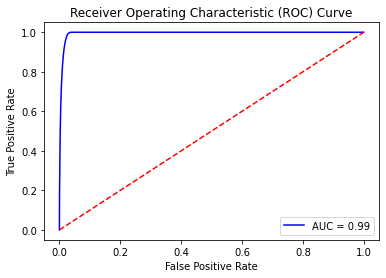

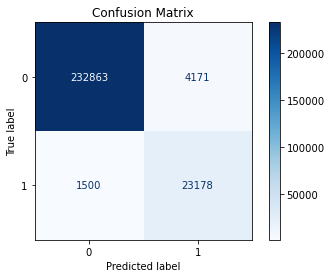

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = meta_learner.predict(test_meta_features)
y_pred_proba = meta_learner.predict_proba(test_meta_features)[:, 1]  # Get probabilities for positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # ROC curve inputs
auc_score = roc_auc_score(y_test, y_pred_proba)  # Calculate AUC score

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

